[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sevgiozturk/Duke_ComputationalNeuroscienceandModeling/blob/main/w2/Week2.ipynb)

Joined version of
[Intro](https://compneuro.neuromatch.io/tutorials/W1D2_ModelFitting/student/W1D2_Intro.html), [Tutorial 1](https://compneuro.neuromatch.io/tutorials/W1D2_ModelFitting/student/W1D2_Tutorial1.html) and [Tutorial 3](https://compneuro.neuromatch.io/tutorials/W1D2_ModelFitting/student/W1D2_Tutorial3.html)

# Intro

## Overview

Today we will talk about how to confront models with experimental data. Does my model capture the behavior of my participant or its neural activity? Does the data support my model against alternatives? Which component in the model is needed? Do parameters in the model vary systematically between two subject populations? We will cover the basic concepts and tools to address these questions, starting with a general overview in the intro. You will learn how to estimate the parameters of simple regression models from the data in Tutorials 1 & 2 and then how to estimate the uncertainty about these values in Tutorial 3. Then you will learn how to select from models of different complexity the one that best accounts for your data (Tutorial 4-6). The outro illustrates some of these techniques in real research examples.

Fitting and comparing models to data is really the bread of butter of data analysis in neuroscience. During Model Types Day, you learned about a whole zoo of different types of models that we’re interested in neuroscience. So here, you will learn about generic concepts and techniques that apply for fitting and comparing any type of model, which is arguably pretty useful! You will apply these tools again when dealing with GLMs, latent models, deep networks, dynamical models, decision models, reinforcement learning models ... it’s everywhere! On top of this, we will cover linear regression models - the typical regression model when the dependent variable is continuous (e.g., BOLD activity) – and use it throughout the day to illustrate the concepts and methods we learn. On the GLM day, you will see how to generalize regression models when the dependent variable is binary (e.g., choices) or an integer (e.g., spike counts).

Almost all statistical and data analysis methods rely either explicitly or implicitly on fitting some model to the data. The concepts and tools you will learn today are crucial to be able to test your hypothesis about how behavior or neural activity is formed. A typical way this is done is that you formulate a computational (stochastic) model that embodies your hypothesis and then one or more control models. Then you fit each of your models to your experimental data, say the pattern of choices of one experimental subject or the spiking activity from one recorded neuron. Simulating your fitted models allows validating that your model indeed captures the effects of interest in your data. Then you use model comparison techniques to tell which one of your main or control model(s) provides a better description of the data. Also, you could assess whether some parameter in your model changes between experimental conditions or subject populations.

## Prerequisite knowledge

In the content and tutorials today, you will be using vectors and matrices (W0D3 T1 & T2), probability distributions (W0D5 T1), and likelihoods (W0D5 T2).  Please review this material if necessary!

##Watch first part [0-7:47]

## Video

In [ ]:
# @markdown
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '9JfXKmVB6qc'), ('Bilibili', 'BV1BX4y1w7oc')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

## Slides

In [ ]:

# @markdown
from IPython.display import IFrame
link_id = "sqcvz"
print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/sqcvz/


# Tutorial 1: Linear regression with MSE

**Week 1, Day 2: Model Fitting**

**By Neuromatch Academy**

**Content creators**: Pierre-Étienne Fiquet, Anqi Wu, Alex Hyafil with help from Byron Galbraith

**Content reviewers**: Lina Teichmann, Saeed Salehi, Patrick Mineault,  Ella Batty, Michael Waskom

___
# Tutorial Objectives

*Estimated timing of tutorial: 30 minutes*

This is Tutorial 1 of a series on fitting models to data. We start with simple linear regression, using least squares optimization (Tutorial 1) and Maximum Likelihood Estimation (Tutorial 2). We will use bootstrapping to build confidence intervals around the inferred linear model parameters (Tutorial 3). We'll finish our exploration of regression models by generalizing to multiple linear regression and polynomial regression (Tutorial 4). We end by learning how to choose between these various models. We discuss the bias-variance trade-off (Tutorial 5) and Cross Validation for model selection (Tutorial 6).

In this tutorial, we will learn how to fit simple linear models to data.
- Learn how to calculate the mean-squared error (MSE)
- Explore how model parameters (slope) influence the MSE
- Learn how to find the optimal model parameter using least-squares optimization

<br>

**Acknowledgements:**
- We thank Eero Simoncelli. Much of today's tutorials are inspired by exercises assigned in his mathtools class.

In [ ]:

# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
link_id = "2mkq4"
print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/2mkq4/


---
# Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [ ]:
#@title Plotting Functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

---
# Section 1: Mean Squared Error (MSE)

In [ ]:
# @title Video 1: Linear Regression & Mean Squared Error
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'HumajfjJ37E'), ('Bilibili', 'BV1tA411e7NW')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

This video covers a 1D linear regression and mean squared error.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

**Linear least squares regression** is an old but gold  optimization procedure that we are going to use for data fitting. Least squares (LS) optimization problems are those in which the objective function is a quadratic function of the
parameter(s) being optimized.

Suppose you have a set of measurements: for each data point or measurement, you have $y_{i}$ (the "dependent" variable) obtained for a different input value, $x_{i}$ (the "independent" or "explanatory" variable).  Suppose we believe the measurements are proportional to the input values, but are corrupted by some (random) measurement errors, $\epsilon_{i}$, that is:

\begin{equation}
y_{i}= \theta x_{i}+\epsilon_{i}
\end{equation}

for some unknown slope parameter $\theta.$ The least squares regression problem uses **mean squared error (MSE)** as its objective function, it aims to find the value of the parameter $\theta$ by minimizing the average of squared errors:

\begin{equation}
\min _{\theta} \frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-\theta x_{i}\right)^{2}
\end{equation}

We will now explore how MSE is used in fitting a linear regression model to data. For illustrative purposes, we will create a simple synthetic dataset where we know the true underlying model. This will allow us to see how our estimation efforts compare in uncovering the real model (though in practice we rarely have this luxury).

First we will generate some noisy samples $x$ from [0, 10) along the line $y = 1.2x$ as our dataset we wish to fit a model to.

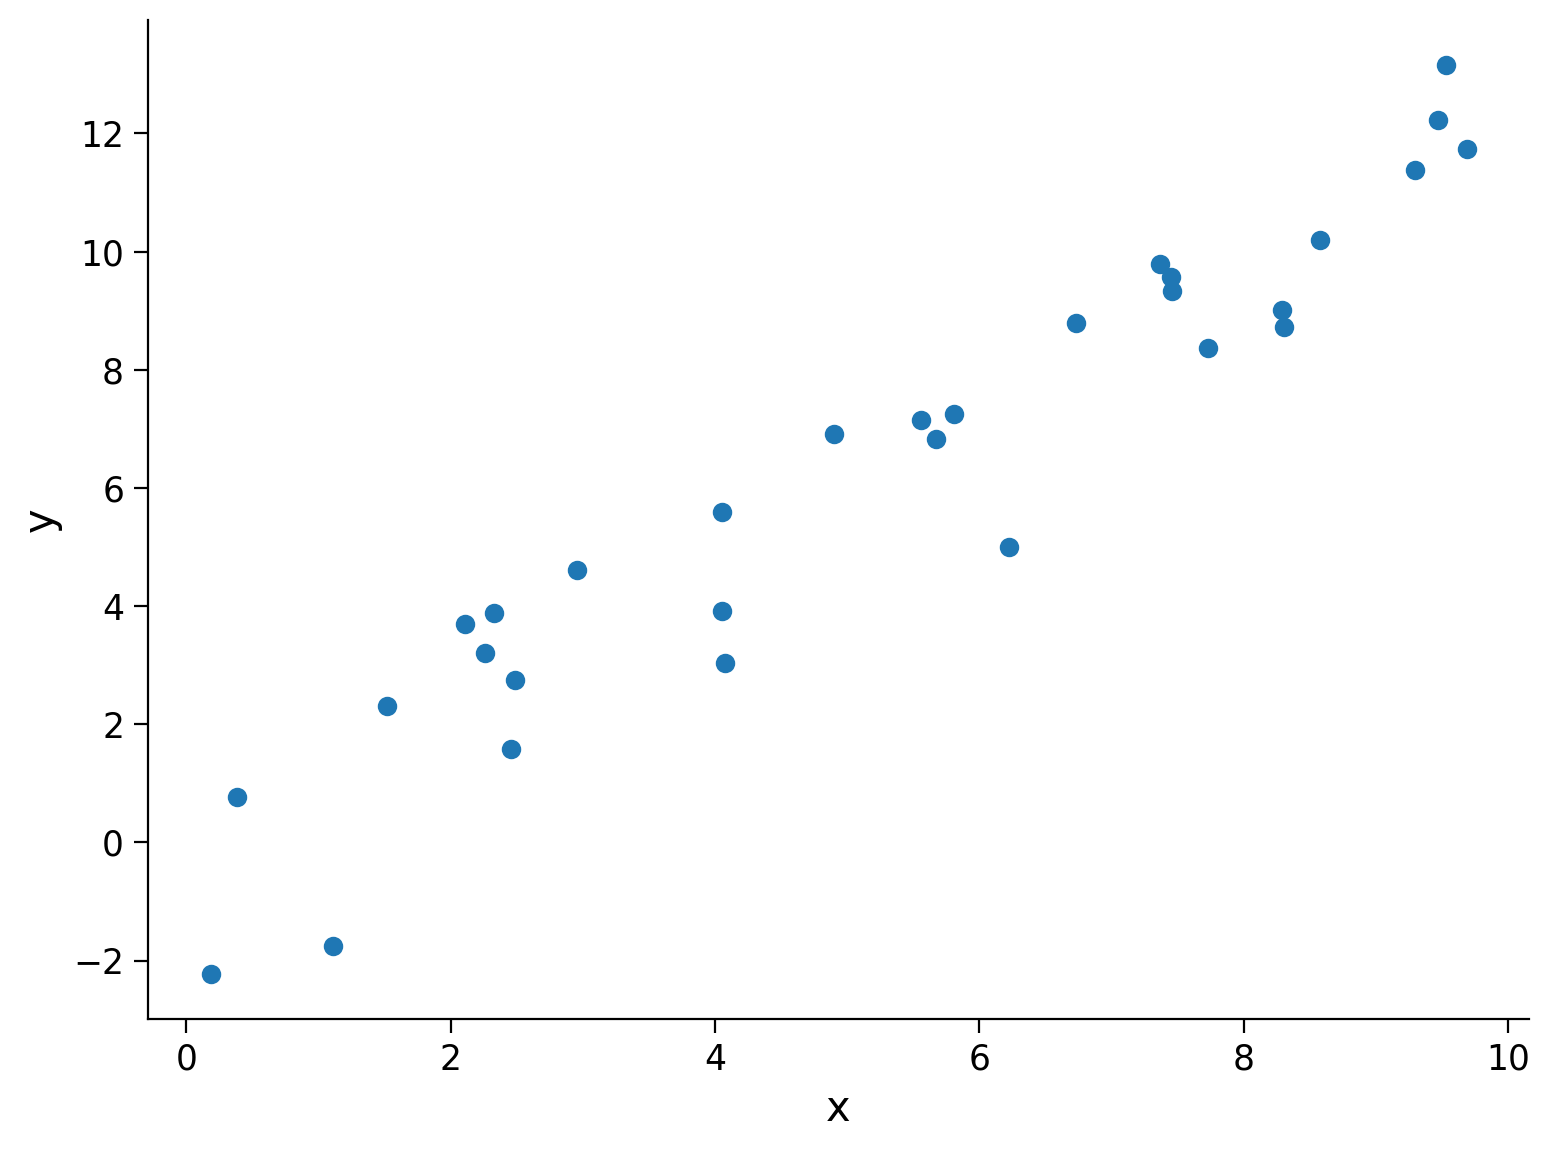

In [ ]:
# @title

# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

Now that we have our suitably noisy dataset, we can start trying to estimate the underlying model that produced it. We use MSE to evaluate how successful a particular slope estimate $\hat{\theta}$ is for explaining the data, with the closer to 0 the MSE is, the better our estimate fits the data.

## Coding Exercise 1: Compute MSE

In this exercise you will implement a method to compute the mean squared error for a set of inputs $\mathbf{x}$, measurements $\mathbf{y}$, and slope estimate $\hat{\theta}$. Here, $\mathbf{x}$ and $\mathbf{y}$ are vectors of data points. We will then compute and print the mean squared error for 3 different choices of theta.

As a reminder, the equation for computing the estimated y for a single data point is:

\begin{equation}
\hat{y}_{i}= \theta x_{i}
\end{equation}

and for mean squared error is:

\begin{equation}
\min _{\theta} \frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-\hat{y}_i\right)^{2}
\end{equation}

In [ ]:
def mse(x, y, theta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """
  ####################################################
  ## TODO for students: compute the mean squared error
  # Fill out function and remove
  raise NotImplementedError("Student exercise: compute the mean squared error")
  ####################################################

  # Compute the estimated y
  y_hat = ...

  # Compute mean squared error
  mse = ...

  return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
  print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D2_ModelFitting/solutions/W1D2_Tutorial1_Solution_12a57de0.py)



The result should be:

theta_hat of 0.75 has an MSE of 9.08\
theta_hat of 1.0 has an MSE of 3.0\
theta_hat of 1.5 has an MSE of 4.52





We see that $\hat{\theta} = 1.0$ is our best estimate from the three we tried. Looking just at the raw numbers, however, isn't always satisfying, so let's visualize what our estimated model looks like over the data.



In [ ]:
#@title

#@markdown Execute this cell to visualize estimated models

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

## Interactive Demo 1: MSE Explorer

Using an interactive widget, we can easily see how changing our slope estimate changes our model fit. We display the **residuals**, the differences between observed and predicted data, as line segments between the data point (observed response) and the corresponding predicted response on the model fit line.

- What value of $\hat{\theta}$ results in the lowest MSE?
- Is this a good way of estimating $\theta$?


In [ ]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  y_hat = theta_hat * x
  plot_observed_vs_predicted(x, y, y_hat, theta_hat)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D2_ModelFitting/solutions/W1D2_Tutorial1_Solution_b528a7bb.py)



While visually exploring several estimates can be instructive, it's not the most efficient for finding the best estimate to fit our data. Another technique we can use is to choose a reasonable range of parameter values and compute the MSE at several values in that interval. This allows us to plot the error against the parameter value (this is also called an **error landscape**, especially when we deal with more than one parameter). We can select the final $\hat{\theta}$  ($\hat{\theta}_\textrm{MSE}$) as the one which results in the lowest error.

In [ ]:
# @title

# @markdown Execute this cell to loop over theta_hats, compute MSE, and plot results

# Loop over different thetas, compute MSE for each
theta_hat_grid = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
  errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]


# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1')
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\hat{{\theta}}_{MSE}$")
ax.set(
  title=fr"Best fit: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend();

We can see that our best fit is $\hat{\theta}=1.18$ with an MSE of 1.45. This is quite close to the original true value $\theta=1.2$!


---
# Section 2: Least-squares optimization

*Estimated timing to here from start of tutorial: 20 min*

While the approach detailed above (computing MSE at various values of $\hat\theta$) quickly got us to a good estimate, it still relied on evaluating the MSE value across a grid of hand-specified values. If we didn't pick a good range to begin with, or with enough granularity, we might miss the best possible estimator. Let's go one step further, and instead of finding the minimum MSE from a set of candidate estimates, let's solve for it analytically.

We can do this by minimizing the cost function. Mean squared error is a convex objective function, therefore we can compute its minimum using calculus. Please see video or Bonus Section 1 for this derivation! After computing the minimum, we find that:

\begin{equation}
\hat\theta = \frac{\mathbf{x}^\top \mathbf{y}}{\mathbf{x}^\top \mathbf{x}}
\end{equation}

where $\mathbf{x}$ and $\mathbf{y}$ are vectors of data points.

This is known as solving the normal equations. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.

## Coding Exercise 2: Solve for the Optimal Estimator

In this exercise, you will write a function that finds the optimal $\hat{\theta}$ value using the least squares optimization approach (the equation above) to solve MSE minimization. It should take arguments $x$ and $y$ and return the solution $\hat{\theta}$.

We will then use your function to compute $\hat{\theta}$ and plot the resulting prediction on top of the data.

In [ ]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  ################################################################################
  ## TODO for students: solve for the best parameter using least squares
  # Fill out function and remove
  raise NotImplementedError("Student exercise: solve for theta_hat using least squares")
  ################################################################################

  # Compute theta_hat analytically
  theta_hat = ...

  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D2_ModelFitting/solutions/W1D2_Tutorial1_Solution_7a89ba24.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D2_ModelFitting/static/W1D2_Tutorial1_Solution_7a89ba24_1.png>



We see that the analytic solution produces an even better result than our grid search from before, producing $\hat{\theta} = 1.21$ with $\text{MSE} = 1.43$!

---
# Summary

*Estimated timing of tutorial: 30 minutes*

Linear least squares regression is an optimization procedure that can be used for data fitting:

  - Task: predict a value for $y_i$ given $x_i$
  - Performance measure: $\textrm{MSE}$
  - Procedure: minimize $\textrm{MSE}$ by solving the normal equations

**Key point**: We fit the model by defining an *objective function* and minimizing it.

**Note**: In this case, there is an *analytical* solution to the minimization problem and in practice, this solution can be computed using *linear algebra*. This is *extremely* powerful and forms the basis for much of numerical computation throughout the sciences.

# Notation
\begin{align}
x_{i} &\quad \text{input, independent variable}\\
y_{i} &\quad \text{measurement, dependent variable}\\
\mathbf{x} &\quad \text{vector of input values}\\
\mathbf{y} &\quad \text{vector of measurements}\\
\hat{y}_{i} &\quad \text{estimate of dependent variable}\\
\epsilon_{i} &\quad \text{measurement error}\\
\theta &\quad \text{slope parameter}\\
\hat{\theta} &\quad \text{estimated slope parameter}\\
\hat{\theta}_\text{MSE} &\quad \text{slope parameter estimated via the mean squared error}\\
\textrm{MSE} &\quad \text{mean squared error}\\
\end{align}

---
# Bonus


---
## Bonus Section 1: Least Squares Optimization Derivation

We will outline here the derivation of the least squares solution.

We first set the derivative of the error expression with respect to $\theta$ equal to zero,

\begin{align}
\frac{d}{d\theta}\frac{1}{N}\sum_{i=1}^N(y_i - \theta x_i)^2 &= 0 \\
\frac{1}{N}\sum_{i=1}^N-2x_i(y_i - \theta x_i) &= 0
\end{align}

where we used the chain rule. Now solving for $\theta$, we obtain an optimal value of:

\begin{equation}
\hat\theta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{equation}

Which we can write in vector notation as:

\begin{equation}
\hat\theta = \frac{\mathbf{x}^\top \mathbf{y}}{\mathbf{x}^\top \mathbf{x}}
\end{equation}

<br>

This is known as solving the *normal equations*. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.

---
##Watch **third part** [15:10-22:20]

In [3]:
# @markdown
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '9JfXKmVB6qc'), ('Bilibili', 'BV1BX4y1w7oc')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

---
# Tutorial 3: Confidence intervals and bootstrapping

1.   List item
2.   List item



**Week 1, Day 2: Model Fitting**

**By Neuromatch Academy**

**Content creators**: Pierre-Étienne Fiquet, Anqi Wu, Alex Hyafil with help from Byron Galbraith

**Content reviewers**: Lina Teichmann, Saeed Salehi, Patrick Mineault, Ella Batty, Michael Waskom

# Tutorial Objectives

*Estimated timing of tutorial: 23 minutes*

This is Tutorial 3 of a series on fitting models to data. We start with simple linear regression, using least squares optimization (Tutorial 1) and Maximum Likelihood Estimation (Tutorial 2). We will use bootstrapping to build confidence intervals around the inferred linear model parameters (Tutorial 3). We'll finish our exploration of regression models by generalizing to multiple linear regression and polynomial regression (Tutorial 4). We end by learning how to choose between these various models. We discuss the bias-variance trade-off (Tutorial 5) and Cross Validation for model selection (Tutorial 6).

In this tutorial, we will discuss how to gauge how good our estimated model parameters are.
- Learn how to use bootstrapping to generate new sample datasets
- Estimate our model parameter on these new sample datasets
- Quantify the variance of our estimate using confidence intervals

In [1]:

# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
link_id = "2mkq4"
print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/2mkq4/


In [2]:
# @title Video 1: Confidence Intervals & Bootstrapping
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'hs6bVGQNSIs'), ('Bilibili', 'BV1vK4y1s7py')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

Up to this point we have been finding ways to estimate model parameters to fit some observed data. Our approach has been to optimize some criterion, either minimize the mean squared error or maximize the likelihood while using the entire dataset. How good is our estimate really? How confident are we that it will generalize to describe new data we haven't seen yet?

One solution to this is to just collect more data and check the MSE on this new dataset with the previously estimated parameters. However this is not always feasible and still leaves open the question of how quantifiably confident we are in the accuracy of our model.

In Section 1, we will explore how to implement bootstrapping. In Section 2, we will build confidence intervals of our estimates using the bootstrapping method.

---
# Setup

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [ ]:
# @title Plotting Functions

def plot_original_and_resample(x, y, x_, y_):
  """ Plot the original sample and the resampled points from this sample.

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    x_ (ndarray): An array of shape (samples,) with a subset of input values from x
    y_ (ndarray): An array of shape (samples,) with a the corresponding subset
      of measurement values as x_ from y

  """
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.scatter(x, y)
  ax1.set(title='Original', xlabel='x', ylabel='y')

  ax2.scatter(x_, y_, color='c')

  ax2.set(title='Resampled', xlabel='x', ylabel='y',
          xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

---
# Section 1: Bootstrapping

*Estimated timing to here from start of tutorial: 7 min*

[Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) is a widely applicable method to assess confidence/uncertainty about estimated parameters, it was originally [proposed](https://projecteuclid.org/euclid.aos/1176344552) by [Bradley Efron](https://en.wikipedia.org/wiki/Bradley_Efron). The idea is to generate many new synthetic datasets from the initial true dataset by randomly sampling from it, then finding estimators for each one of these new datasets, and finally looking at the distribution of all these estimators to quantify our confidence.

Note that each new resampled datasets will be the same size as our original one, with the new data points sampled with replacement i.e. we can repeat the same data point multiple times. Also note that in practice we need a lot of resampled datasets, here we use 2000.

To explore this idea, we will start again with our noisy samples along the line $y_i = 1.2x_i + \epsilon_i$, but this time, we only use half the data points as last time (15 instead of 30).

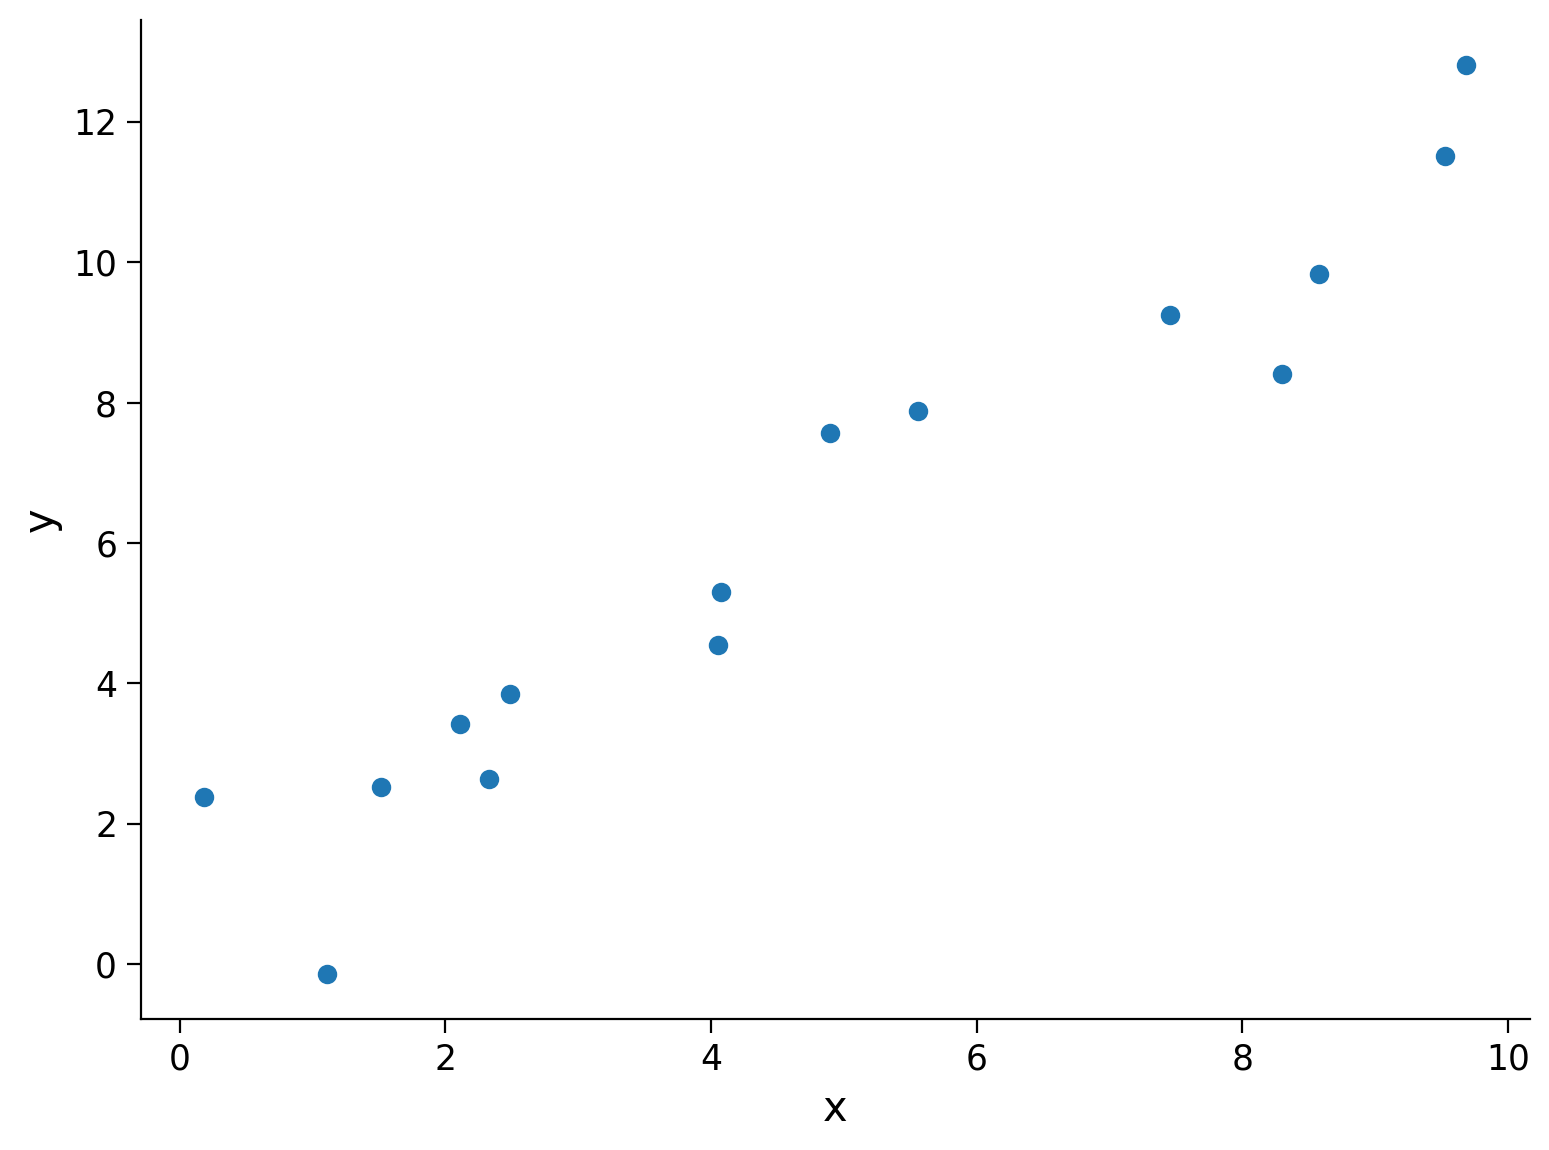

In [ ]:
#@title

#@markdown Execute this cell to simulate some data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 15

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

## Coding Exercise 1: Resample Dataset with Replacement

In this exercise you will implement a method to resample a dataset with replacement. The method accepts $\mathbf{x}$ and $\mathbf{y}$ arrays. It should return a new set of $\mathbf{x}'$ and $\mathbf{y}'$ arrays that are created by randomly sampling from the originals.

We will then compare the original dataset to a resampled dataset.

**Hint:** The [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) method would be useful here.

In [ ]:
def resample_with_replacement(x, y):
  """Resample data points with replacement from the dataset of `x` inputs and
  `y` measurements.

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    ndarray, ndarray: The newly resampled `x` and `y` data points.
  """
  #######################################################
  ## TODO for students: resample dataset with replacement
  # Fill out function and remove
  raise NotImplementedError("Student exercise: resample dataset with replacement")
  #######################################################

  # Get array of indices for resampled points
  sample_idx = ...

  # Sample from x and y according to sample_idx
  x_ = ...
  y_ = ...

  return x_, y_

x_, y_ = resample_with_replacement(x, y)

plot_original_and_resample(x, y, x_, y_)

NotImplementedError: ignored

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D2_ModelFitting/solutions/W1D2_Tutorial3_Solution_81af3bd6.py)

*Example output:*

<img alt='Solution hint' align='left' width=1711.0 height=705.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D2_ModelFitting/static/W1D2_Tutorial3_Solution_81af3bd6_0.png>



In the resampled plot on the right, the actual number of points is the same, but some have been repeated so they only display once.

Now that we have a way to resample the data, we can use that in the full bootstrapping process.

## Coding Exercise 2: Bootstrap Estimates

In this exercise you will implement a method to run the bootstrap process of generating a set of $\hat\theta$ values from a dataset of inputs ($\mathbf{x}$) and  measurements ($\mathbf{y}$). You should use `resample_with_replacement` here, and you may also invoke the helper function `solve_normal_eqn` from Tutorial 1 to produce the MSE-based estimator.

We will then use this function to look at the theta_hat from different samples.


In [ ]:
# @markdown Execute this cell for helper function `solve_normal_eqn`
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    thata_hat (float): An estimate of the slope parameter.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """
  theta_hat = (x.T @ y) / (x.T @ x)
  return theta_hat

In [ ]:
def bootstrap_estimates(x, y, n=2000):
  """Generate a set of theta_hat estimates using the bootstrap method.

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    n (int): The number of estimates to compute

  Returns:
    ndarray: An array of estimated parameters with size (n,)
  """
  theta_hats = np.zeros(n)

  ##############################################################################
  ## TODO for students: implement bootstrap estimation
  # Fill out function and remove
  raise NotImplementedError("Student exercise: implement bootstrap estimation")
  ##############################################################################

  # Loop over number of estimates
  for i in range(n):

    # Resample x and y
    x_, y_ = ...

    # Compute theta_hat for this sample
    theta_hats[i] = ...

  return theta_hats


# Set random seed
np.random.seed(123)

# Get bootstrap estimates
theta_hats = bootstrap_estimates(x, y, n=2000)
print(theta_hats[0:5])

NotImplementedError: ignored

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D2_ModelFitting/solutions/W1D2_Tutorial3_Solution_d73b40e4.py)



You should see `[1.27550888 1.17317819 1.18198819 1.25329255 1.20714664]` as the first five estimates.

Now that we have our bootstrap estimates, we can visualize all the potential models (models computed with different resampling) together to see how distributed they are.

NotImplementedError: ignored

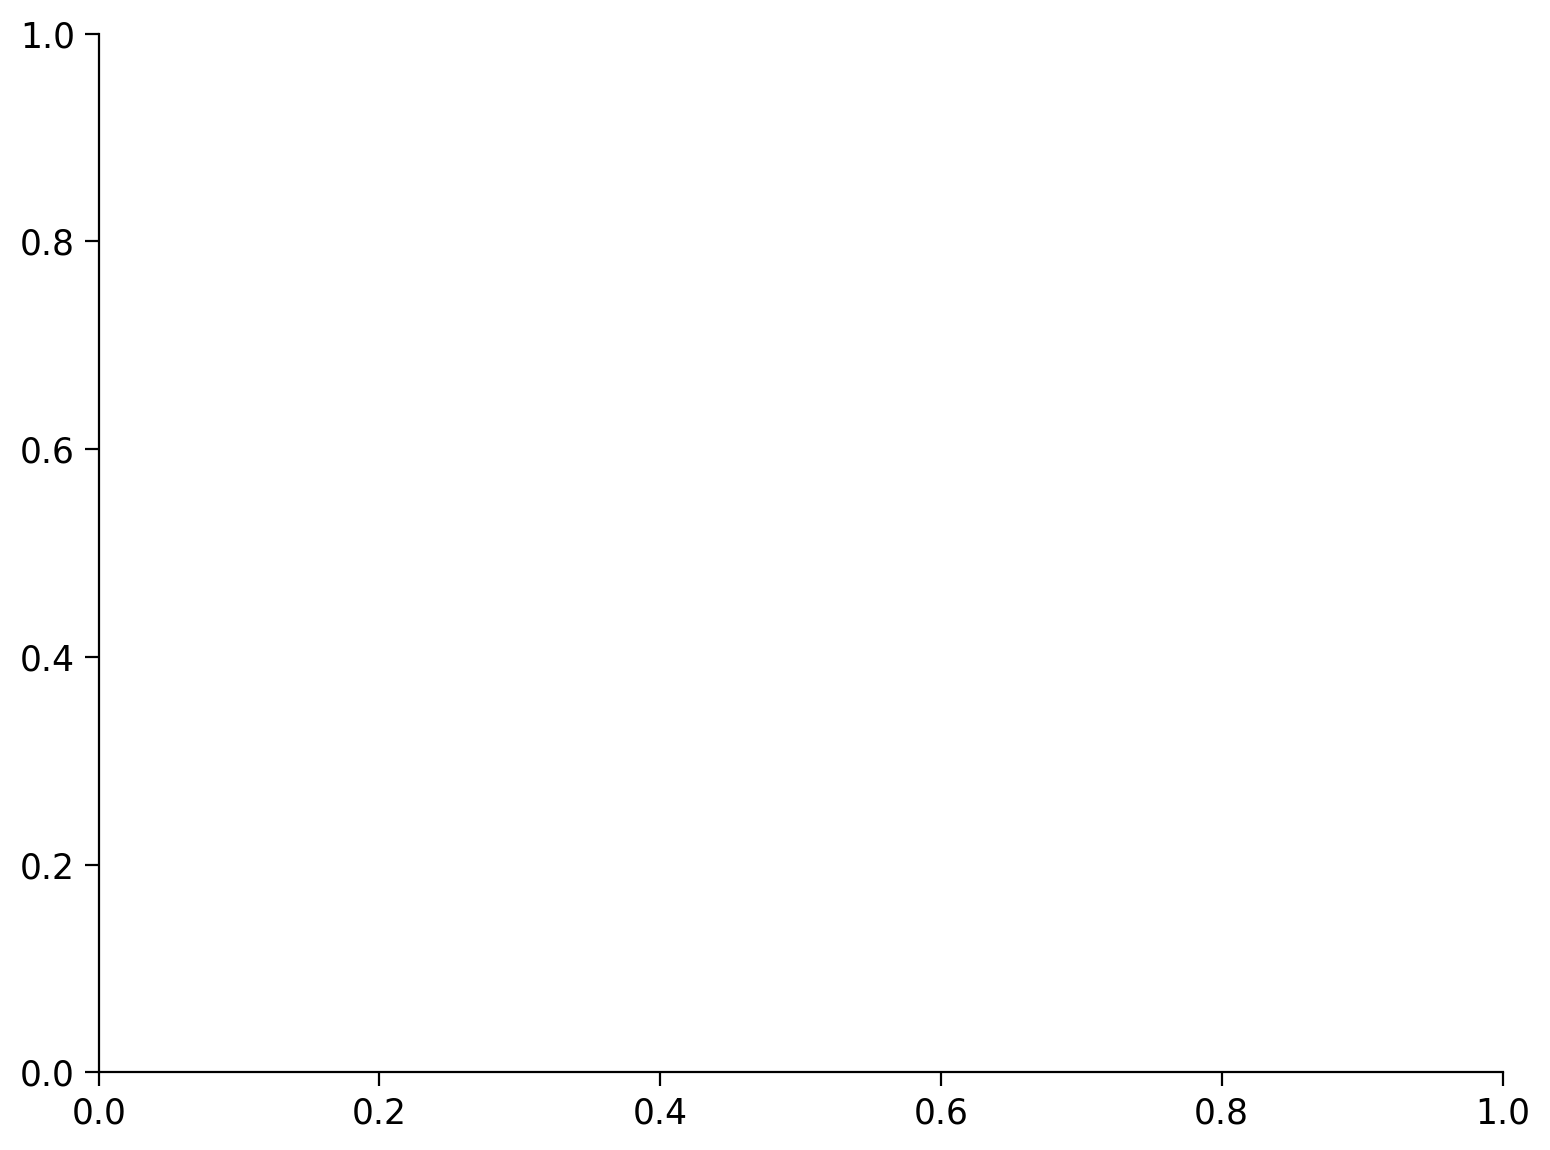

In [ ]:
#@title
#@markdown Execute this cell to visualize all potential models

fig, ax = plt.subplots()

# For each theta_hat, plot model
theta_hats = bootstrap_estimates(x, y, n=2000)
for i, theta_hat in enumerate(theta_hats):
  y_hat = theta_hat * x
  ax.plot(x, y_hat, c='r', alpha=0.01, label='Resampled Fits' if i==0 else '')

# Plot observed data
ax.scatter(x, y, label='Observed')

# Plot true fit data
y_true = theta * x
ax.plot(x, y_true, 'g', linewidth=2, label='True Model')

ax.set(
  title='Bootstrapped Slope Estimation',
  xlabel='x',
  ylabel='y'
)

# Change legend line alpha property
handles, labels = ax.get_legend_handles_labels()
handles[0].set_alpha(1)

ax.legend();

This looks pretty good! The bootstrapped estimates spread around the true model, as we would have hoped. Note that here we have the luxury to know the ground truth value for $\theta$, but in applications we are trying to guess it from data. Therefore, assessing  the  quality  of  estimates  based  on  finite data is a task of fundamental importance in data analysis.


---
# Section 2: Confidence Intervals

*Estimated timing to here from start of tutorial: 17 min*

Let us now quantify how uncertain our estimated slope is. We do so by computing [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) (CIs) from our bootstrapped estimates. The most direct approach is to compute percentiles from the empirical distribution of bootstrapped estimates. Note that this is widely applicable as we are not assuming that this empirical distribution is Gaussian.

Looking at the distribution of bootstrapped $\hat{\theta}$ values, we see that the true $\theta$ falls well within the 95% confidence interval, which is reassuring. We also see that the value $\theta = 1$ does not fall within the confidence interval. From this we would reject the hypothesis that the slope was 1.

---
# Summary

*Estimated timing of tutorial: 23 minutes*

- Bootstrapping is a resampling procedure that allows to build confidence intervals around inferred parameter values
- it is a widely applicable and very practical method that relies on computational power and pseudo-random number generators (as opposed to more classical approaches than depend on analytical derivations)

---
# Notation

\begin{align}
\theta &\quad \text{parameter}\\
\hat{\theta} &\quad \text{estimated parameter}\\
x &\quad \text{input, independent variable}\\
y &\quad \text{response measurement, dependent variable}\\
\mathbf{x} &\quad \text{vector of input values}\\
\mathbf{y} &\quad \text{vector of measurements}\\
\mathbf{x}' &\quad \text{vector of resampled input values }\\
\mathbf{y}' &\quad \text{vector of resampled measurement values}\\
\end{align}

**Suggested readings**

Computer Age Statistical Inference: Algorithms, Evidence and Data Science, by Bradley Efron and Trevor Hastie


---

# Bonus Section 1: Logistic regression

The fundamental input/output equation of logistic regression is:

\begin{equation}
\hat{y} \equiv p(y=1|x,\theta) = \sigma(\theta^\top x)
\end{equation}

Note that we interpret the output of logistic regression, $\hat{y}$, as the **probability that y = 1** given inputs $x$ and parameters $\theta$.

Here $\sigma(\cdot)$ is a "squashing" function called the **sigmoid function** or **logistic function**. Its output is in the range $0 \leq y \leq 1$. It looks like this:

\begin{equation}
\sigma(z) = \frac{1}{1 + \textrm{exp}(-z)}
\end{equation}

Recall that $z = \theta^\top x$. The parameters decide whether $\theta^\top x$ will be very negative, in which case $\sigma(\theta^\top x)\approx 0$, or very positive, meaning  $\sigma(\theta^\top x)\approx 1$.
</details>

<img alt='Solution hint' align='left' width=1116.0 height=828.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D3_GeneralizedLinearModels/static/W1D3_Tutorial2_Solution_89590c8d_0.png>

In [7]:
#X represents the size of a tumor in centimeters.
import numpy as np
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X,y) # fit() that takes the independent and dependent values as parameters and fills the regression object with data that describes the relationship



LogisticRegression()

Now we have a logistic regression object that is ready to whether a tumor is cancerous based on the tumor size:

In [10]:
#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(np.array([3.46]).reshape(-1,1))
print(predicted)

[0]
